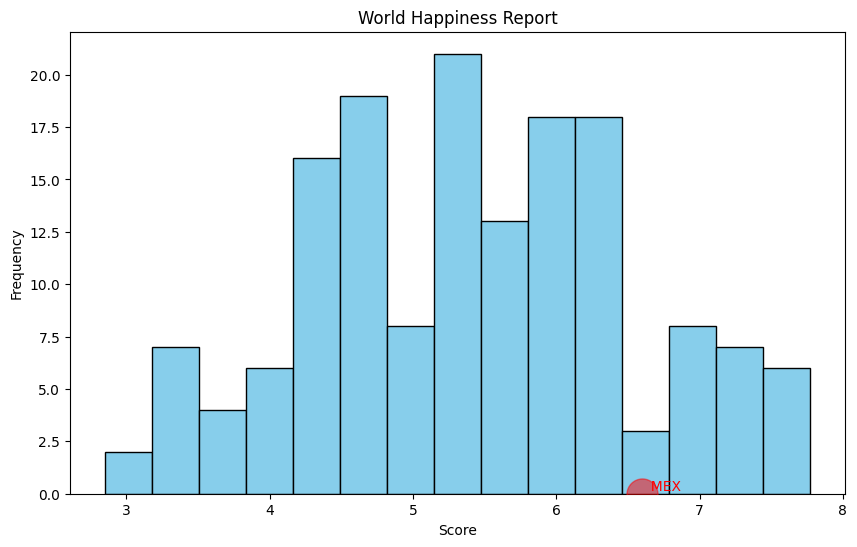

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


happiness = pd.read_csv('/content/Happiness_report.csv')

mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

# Filtrar los datos para México y ajustar el índice
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
mexico_score = mexico['Score'].iloc[0]

# Crear el histograma

plt.figure(figsize=(10,6))
plt.hist(happiness['Score'], bins=15, color='skyblue', edgecolor='black')
mexico_score = mexico['Score'].iloc[0]
plt.text(mexico_score, 0, '  MEX', color='red', verticalalignment='bottom', horizontalalignment='left', zorder=5)
plt.scatter(mexico_score, 0, color='red', s=500, zorder=50, alpha=0.5)
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


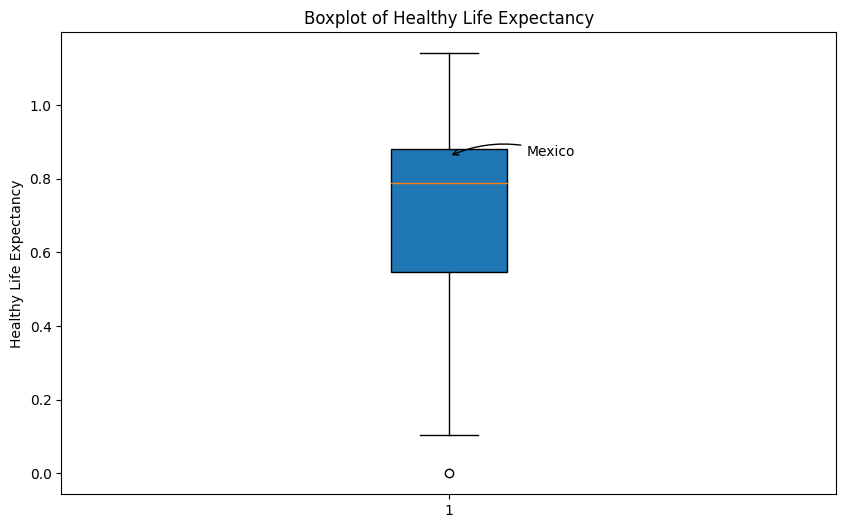

In [7]:
#Boxplot para 'Healthy life expectancy'
plt.figure(figsize=(10, 6))
box = plt.boxplot(happiness['Healthy life expectancy'], patch_artist=True)

mexico_expectancy = mexico['Healthy life expectancy'][0]

plt.annotate('Mexico', xy=(1, mexico_expectancy), xytext=(1.1, mexico_expectancy),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('Boxplot of Healthy Life Expectancy')
plt.ylabel('Healthy Life Expectancy')
plt.show()

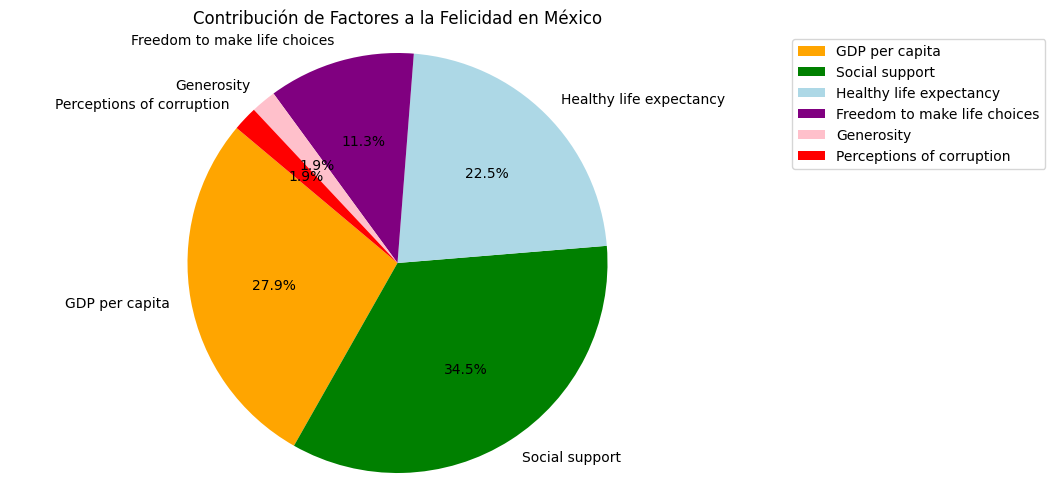

In [8]:

factors = mexico[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
plt.figure(figsize=(10, 6))
plt.pie(factors.iloc[0], labels=factors.columns, autopct='%1.1f%%', startangle=140,
        colors=['orange', 'green', 'lightblue', 'purple', 'pink', 'red'])
plt.title('Contribución de Factores a la Felicidad en México')
plt.axis('equal')
plt.legend(factors.columns, loc="best", bbox_to_anchor=(1, 1))
plt.show()

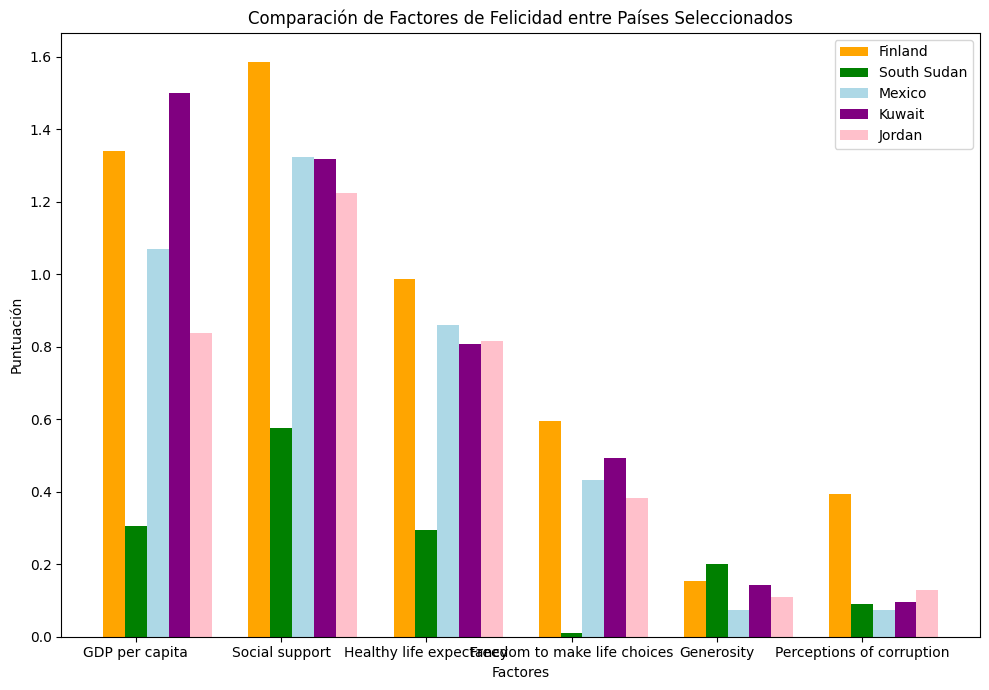

In [9]:
most_happy = happiness.iloc[0]  # El más feliz
least_happy = happiness.iloc[-1]  # El menos feliz
mexico = happiness[happiness['Country or region'] == 'Mexico'].iloc[0]
random_country_1 = happiness.iloc[50]  # Un país al azar o de interés
random_country_2 = happiness.iloc[100]  # Otro país al azar o de interés

# Crear un dataframe con estos países
selected_countries = pd.DataFrame([most_happy, least_happy, mexico, random_country_1, random_country_2])

factor_columns = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


fig, ax = plt.subplots(figsize=(10, 7))

colors = ['orange', 'green', 'lightblue', 'purple', 'pink', 'red']
country_labels = selected_countries['Country or region']
bar_width = 0.15  # Ancho de las barras
index = np.arange(len(factor_columns))  # La posición de las barras en el eje X

for i, country in enumerate(selected_countries.iterrows()):
    plt.bar(index + i*bar_width, country[1][factor_columns], bar_width, label=country_labels.iloc[i], color=colors[i])

plt.xlabel('Factores')
plt.ylabel('Puntuación')
plt.title('Comparación de Factores de Felicidad entre Países Seleccionados')
plt.xticks(index + bar_width, factor_columns)
plt.legend()
plt.tight_layout()

plt.show()

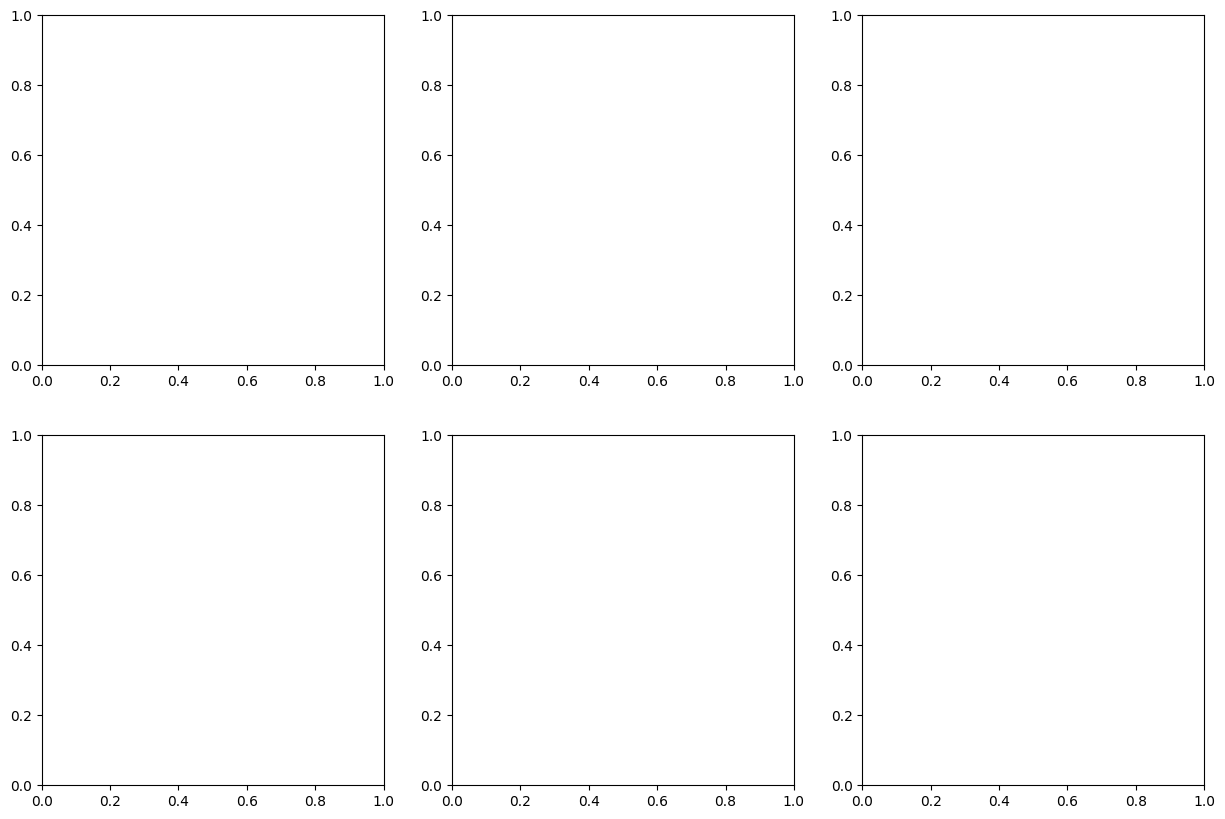

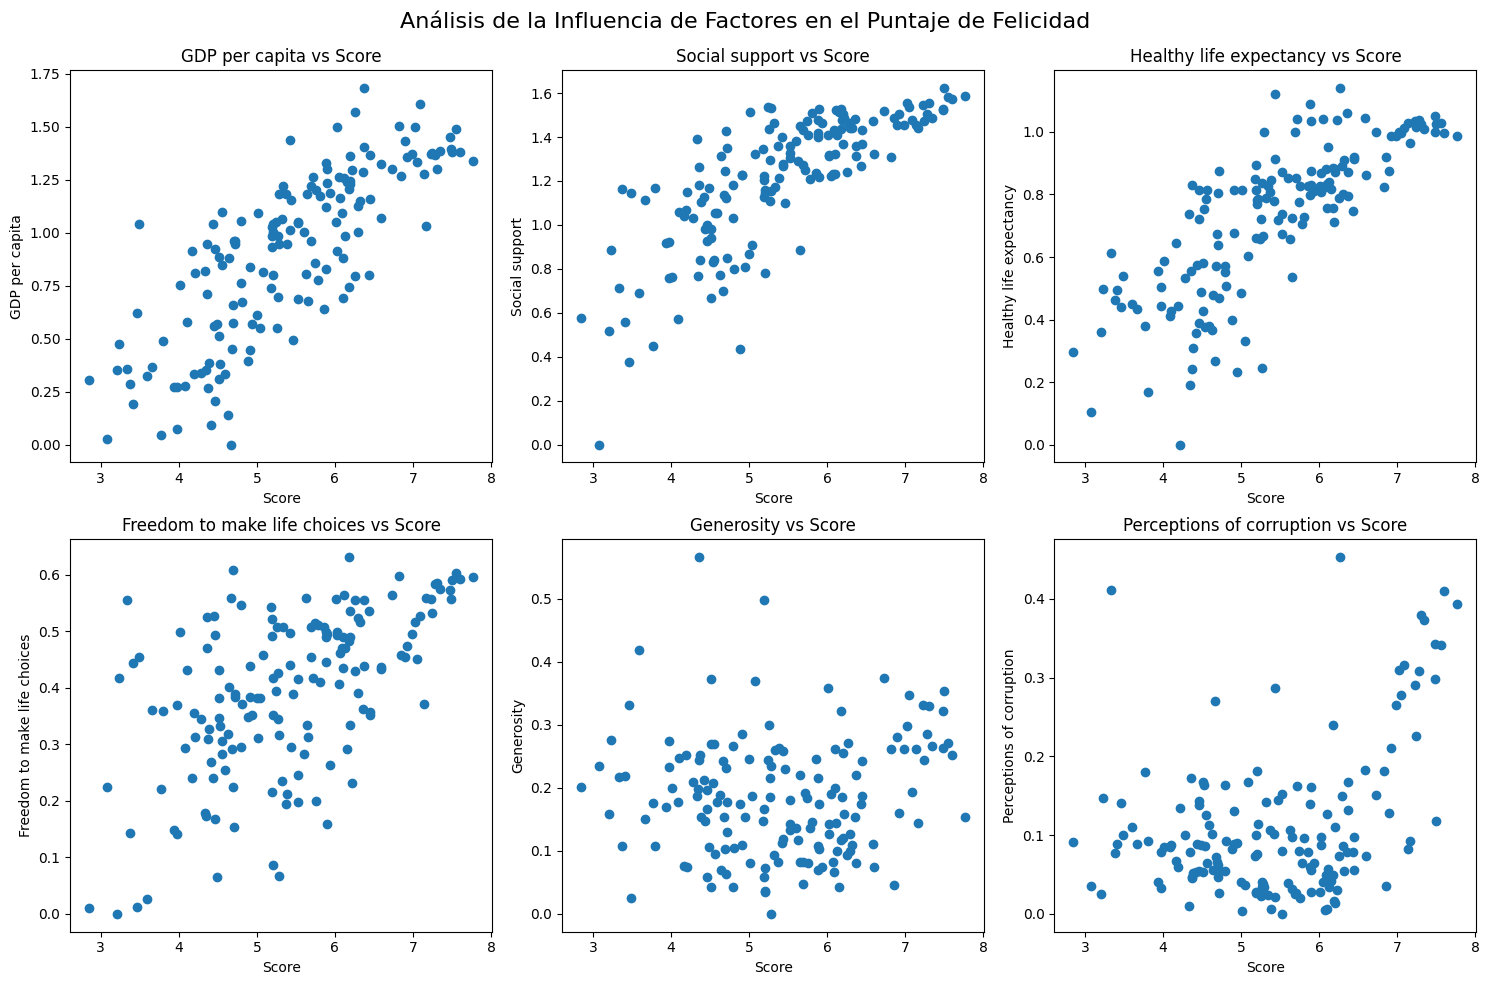

In [10]:
score_column = 'Score'

# Crear la matriz de subgráficas de 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # Tamaño ajustable según tus necesidades
axs = axs.flatten()  # Aplanar el arreglo de ejes para facilitar la iteración

fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # Tamaño ajustable según tus necesidades
axs = axs.flatten()  # Aplanar el arreglo de ejes para facilitar la iteración

# Iterar a través de cada factor y crear un scatter plot por cada uno
for i, factor in enumerate(factor_columns):
    axs[i].scatter(happiness[score_column], happiness[factor])
    axs[i].set_xlabel(score_column)
    axs[i].set_ylabel(factor)
    axs[i].set_title(f'{factor} vs {score_column}')

# Ajustar el layout para evitar que los títulos se superpongan y añadir título general
plt.tight_layout()
fig.suptitle('Análisis de la Influencia de Factores en el Puntaje de Felicidad', fontsize=16)

# Ajustar subgráficas para dar espacio al título general
plt.subplots_adjust(top=0.92)

# Mostrar la gráfica
plt.show()

In [ ]:
factors_with_score = factor_columns + [score_column]

correlation_matrix = happiness[factors_with_score].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Heatmap de Correlación entre Puntaje de Felicidad y Factores')

plt.show()

In [ ]:
metadata = pd.read_csv('/content/Metadata.csv')


# Combinar DataFrames en uno nuevo basado en la columna común
combined_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName', how='left')

average_happiness_by_region = combined_df.groupby('Region')['Score'].mean().reset_index()


plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    x='Region',
    y='Score',
    data=average_happiness_by_region,
    palette='Spectral'
)
plt.title('World Happiness Report')
plt.xlabel('Region')
plt.ylabel('Score')
plt.xticks(rotation=90)

plt.show()

